# 1. Packages

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mhdzahier/travel-insurance")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\juand\.cache\kagglehub\datasets\mhdzahier\travel-insurance\versions\1


In [60]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv (r'C:\Users\juand\OneDrive\Escritorio\TripleTen\Sprint 10\Travel-Insurance\Data\travel insurance.csv')
#df = pd.read_csv (r'C:\Users\valen\OneDrive\Escritorio\Juano_VS\Travel-Insurance\Data\travel insurance.csv')
df.columns = df.columns.str.lower().str.strip()
df['claim'] = df['claim'].map ({'No':0, 'Yes':1})
df['gender'] = df['gender'].replace (np.nan, 'None')
print (df.info())
print ()
print (df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                63326 non-null  object 
 1   agency type           63326 non-null  object 
 2   distribution channel  63326 non-null  object 
 3   product name          63326 non-null  object 
 4   claim                 63326 non-null  int64  
 5   duration              63326 non-null  int64  
 6   destination           63326 non-null  object 
 7   net sales             63326 non-null  float64
 8   commision (in value)  63326 non-null  float64
 9   gender                63326 non-null  object 
 10  age                   63326 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 5.3+ MB
None

  agency    agency type distribution channel                     product name  \
0    CBH  Travel Agency              Offline               Comprehensive Plan  

In [7]:
gender = pd.get_dummies (df['gender'], drop_first=True)
print (gender.head())

       M   None
0  False  False
1  False  False
2  False   True
3  False   True
4  False   True


In [8]:
# ohe- One Hot Encoding
df_ohe = pd.get_dummies (df, drop_first=True, dtype=int)
print (df_ohe.head(3))

   claim  duration  net sales  commision (in value)  age  agency_ART  \
0      0       186      -29.0                  9.57   81           0   
1      0       186      -29.0                  9.57   71           0   
2      0        65      -49.5                 29.70   32           0   

   agency_C2B  agency_CBH  agency_CCR  agency_CSR  ...  destination_URUGUAY  \
0           0           1           0           0  ...                    0   
1           0           1           0           0  ...                    0   
2           0           0           0           0  ...                    0   

   destination_UZBEKISTAN  destination_VANUATU  destination_VENEZUELA  \
0                       0                    0                      0   
1                       0                    0                      0   
2                       0                    0                      0   

   destination_VIET NAM  destination_VIRGIN ISLANDS, U.S.  destination_ZAMBIA  \
0                   

In [9]:
df_ohe

,claim,duration,net sales,commision (in value),age,agency_ART,agency_C2B,agency_CBH,agency_CCR,agency_CSR,...,destination_URUGUAY,destination_UZBEKISTAN,destination_VANUATU,destination_VENEZUELA,destination_VIET NAM,"destination_VIRGIN ISLANDS, U.S.",destination_ZAMBIA,destination_ZIMBABWE,gender_M,gender_None
0,0,186,-29.0,9.57,81,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,186,-29.0,9.57,71,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,65,-49.5,29.70,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,60,-39.6,23.76,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,79,-19.8,11.88,41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,0,111,35.0,12.25,31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63322,0,58,40.0,14.00,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63323,0,2,18.0,6.30,57,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63324,0,3,18.0,6.30,63,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                63326 non-null  object 
 1   agency type           63326 non-null  object 
 2   distribution channel  63326 non-null  object 
 3   product name          63326 non-null  object 
 4   claim                 63326 non-null  int64  
 5   duration              63326 non-null  int64  
 6   destination           63326 non-null  object 
 7   net sales             63326 non-null  float64
 8   commision (in value)  63326 non-null  float64
 9   gender                63326 non-null  object 
 10  age                   63326 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 5.3+ MB


In [11]:
X = df_ohe.drop ('claim', axis=1)
y = df_ohe['claim']
x_train, x_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state=12345)
print (x_train.shape)
print (x_test.shape)

(47494, 196)
(15832, 196)


In [12]:
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit (x_train, y_train)
print ('Trained')

Trained


In [13]:
# label encoding 
# LabelEncoder - una columns 
# OrdinalEncoder - Multiples columnas o el dataset entero 

from sklearn.preprocessing import OrdinalEncoder

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                63326 non-null  object 
 1   agency type           63326 non-null  object 
 2   distribution channel  63326 non-null  object 
 3   product name          63326 non-null  object 
 4   claim                 63326 non-null  int64  
 5   duration              63326 non-null  int64  
 6   destination           63326 non-null  object 
 7   net sales             63326 non-null  float64
 8   commision (in value)  63326 non-null  float64
 9   gender                63326 non-null  object 
 10  age                   63326 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 5.3+ MB


In [15]:
encoder = OrdinalEncoder ()
encoder.fit (df)

,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [16]:
data_original = pd.DataFrame (encoder.transform(df), columns=df.columns)
X = data_original.drop ('claim', axis=1)
y = data_original['claim']
x_train, x_valid, y_train, y_valid = train_test_split (X, y, test_size=0.25, random_state=12345)

tree = DecisionTreeClassifier (random_state=12345)
tree.fit (x_train, y_train)

print ('Trained')

Trained


In [17]:
df

,agency,agency type,distribution channel,product name,claim,duration,destination,net sales,commision (in value),gender,age
0,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,None,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,None,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,None,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,0,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,0,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,0,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,0,3,VIET NAM,18.0,6.30,M,63


In [18]:
df

,agency,agency type,distribution channel,product name,claim,duration,destination,net sales,commision (in value),gender,age
0,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,None,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,None,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,None,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,0,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,0,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,0,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,0,3,VIET NAM,18.0,6.30,M,63


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                63326 non-null  object 
 1   agency type           63326 non-null  object 
 2   distribution channel  63326 non-null  object 
 3   product name          63326 non-null  object 
 4   claim                 63326 non-null  int64  
 5   duration              63326 non-null  int64  
 6   destination           63326 non-null  object 
 7   net sales             63326 non-null  float64
 8   commision (in value)  63326 non-null  float64
 9   gender                63326 non-null  object 
 10  age                   63326 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 5.3+ MB


In [20]:
features = df.drop ('claim', axis=1)
valid = df['claim']
features_train, features_valid, target_train, target_valid = train_test_split (features, valid, test_size=0.25, random_state=12345)
numeric = ['duration', 'net sales', 'commision (in value)', 'age']
scaler = StandardScaler ()
scaler.fit (features_train[numeric])
features_train[numeric] = scaler.transform (features_train[numeric])
features_valid[numeric] = scaler.transform (features_valid[numeric])

In [21]:
features_train

,agency,agency type,distribution channel,product name,duration,destination,net sales,commision (in value),gender,age
11802,EPX,Travel Agency,Online,Cancellation Plan,-0.270986,CAMBODIA,-0.587532,-0.492155,None,-0.284018
45973,JZI,Airlines,Online,Basic Plan,-0.221229,HONG KONG,0.066134,0.279529,F,-0.496313
49964,EPX,Travel Agency,Online,2 way Comprehensive Plan,-0.221229,SINGAPORE,-0.117709,-0.492155,None,-0.284018
24101,EPX,Travel Agency,Online,Cancellation Plan,-0.111764,SINGAPORE,-0.628386,-0.492155,None,-0.284018
45809,RAB,Airlines,Online,Value Plan,-0.121715,BRUNEI DARUSSALAM,-0.526251,-0.191499,M,-0.567079
...,...,...,...,...,...,...,...,...,...,...
44457,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,-0.181423,GREECE,-0.428201,0.103144,None,-0.637844
19876,C2B,Airlines,Online,Bronze Plan,-0.370499,SINGAPORE,-0.527272,-0.304746,F,-0.708609
2177,EPX,Travel Agency,Online,1 way Comprehensive Plan,-0.470013,CHINA,-0.281126,-0.492155,None,-0.284018
11749,EPX,Travel Agency,Online,2 way Comprehensive Plan,-0.121715,PHILIPPINES,-0.424115,-0.492155,None,-0.284018


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                63326 non-null  object 
 1   agency type           63326 non-null  object 
 2   distribution channel  63326 non-null  object 
 3   product name          63326 non-null  object 
 4   claim                 63326 non-null  int64  
 5   duration              63326 non-null  int64  
 6   destination           63326 non-null  object 
 7   net sales             63326 non-null  float64
 8   commision (in value)  63326 non-null  float64
 9   gender                63326 non-null  object 
 10  age                   63326 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 5.3+ MB


In [23]:
df_ohe = pd.get_dummies (df, drop_first=True, dtype=int)
X = df_ohe.drop ('claim', axis=1)
y = df_ohe['claim']
x_train, x_valid, y_train, y_valid = train_test_split (X, y, test_size=0.25, random_state=12345)
numeric = ['duration', 'net sales', 'commision (in value)', 'age']
scaler = StandardScaler ()
scaler.fit (x_train[numeric])
x_train [numeric] = scaler.transform (x_train[numeric])
x_valid [numeric] = scaler.transform (x_valid[numeric])
print (x_train.shape)

(47494, 196)


In [24]:
model = DecisionTreeClassifier (random_state=12345)
model.fit (x_train, y_train)
predicted_valid = pd.Series (model.predict (x_valid))
accuracy_valid = accuracy_score (y_valid, predicted_valid)
print (accuracy_valid)

0.9698079838302173


claim
0    0.985361
1    0.014639
Name: proportion, dtype: float64


<Axes: xlabel='claim'>

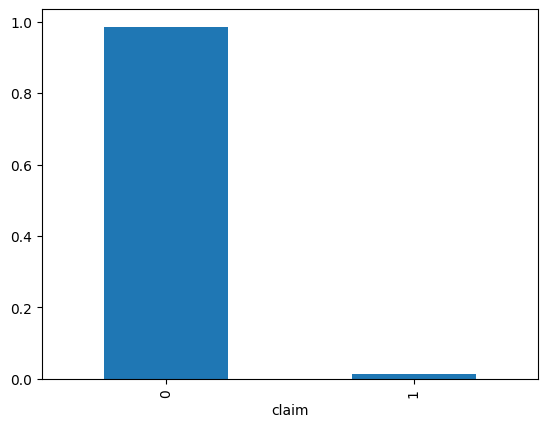

In [25]:
class_frequency = df['claim'].value_counts (normalize=True)
print (class_frequency)
class_frequency.plot (kind='bar')

0    0.982693
1    0.017307
Name: proportion, dtype: float64


<Axes: >

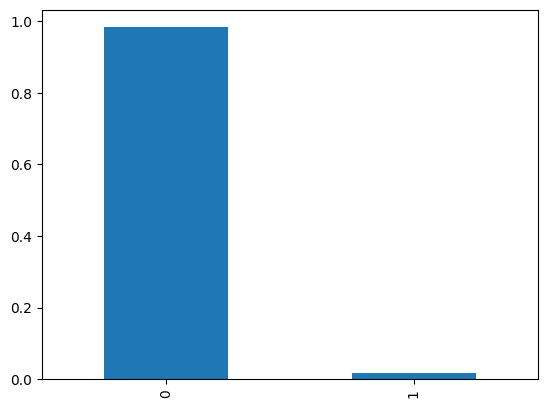

In [26]:
class_frequency = predicted_valid.value_counts (normalize=True)
print (class_frequency)
class_frequency.plot (kind='bar')

In [27]:
target_pred_constant = [0] * len(y_valid)
print (accuracy_score(y_valid, target_pred_constant))

0.9850934815563416


In [28]:
target = pd.Series([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])
predictions = pd.Series([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

vp = 0
for i in range(len(predictions)):
    if (predictions [i] == target[i]) and (predictions[i] == 1): 
        vp += 1
print (vp)

5


In [29]:
vn = 0
for i in range(len(predictions)):
    if (predictions [i] == target[i]) and (predictions[i] == 0): 
        vn += 1
print (vn)

4


In [30]:
fp = 0
for i in range(len(predictions)):
    if (predictions [i] != target[i]) and (predictions[i] == 1): 
        fp += 1
print (fp)

3


In [31]:
fn = 0
for i in range(len(predictions)):
    if (predictions [i] != target[i]) and (predictions[i] == 0): 
        fn += 1
print (fn)

2


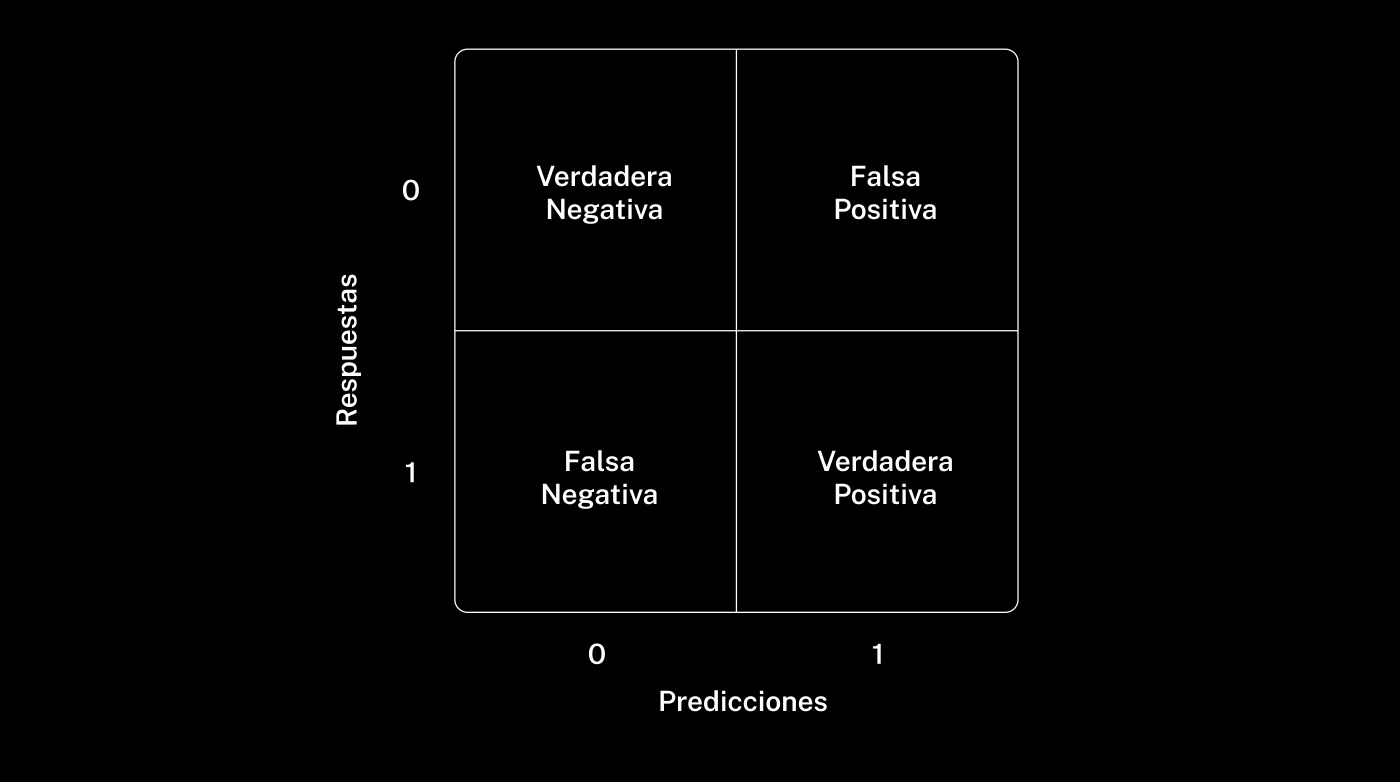

In [32]:
print (confusion_matrix(target, predictions))

[[4 3]
 [2 5]]


In [33]:
matrix = confusion_matrix (y_valid, predicted_valid)
print (matrix)

[[15338   258]
 [  220    16]]


# Recall

VP / (VP+FN)

In [34]:
recall = recall_score(y_valid, predicted_valid)

# Precision

VP/VP+FP

In [35]:
precision = precision_score(y_valid, predicted_valid)

# F1
Media armónica entre recall y precision 

F1 = (2 * precision * recall)/(precision + recall)

Cuando recall y precision se acercan a cero hay que entender que F1 (Media armónica tambien se acerca a cero)

In [36]:
F1= (2*recall*precision)/(recall+precision)
F1

0.06274509803921569

In [37]:
print (f1_score(y_valid, predicted_valid))

0.06274509803921569


In [38]:
# Ajuste de peso de clase 
model = LogisticRegression (random_state=12345, solver='liblinear', class_weight='balanced')
model.fit (x_train, y_train)
predicted_valid = model.predict (x_valid)
print (f1_score (y_valid, predicted_valid))

0.0990845449649973


In [39]:
x_train

,duration,net sales,commision (in value),age,agency_ART,agency_C2B,agency_CBH,agency_CCR,agency_CSR,agency_CWT,...,destination_URUGUAY,destination_UZBEKISTAN,destination_VANUATU,destination_VENEZUELA,destination_VIET NAM,"destination_VIRGIN ISLANDS, U.S.",destination_ZAMBIA,destination_ZIMBABWE,gender_M,gender_None
11802,-0.270986,-0.587532,-0.492155,-0.284018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45973,-0.221229,0.066134,0.279529,-0.496313,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49964,-0.221229,-0.117709,-0.492155,-0.284018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24101,-0.111764,-0.628386,-0.492155,-0.284018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45809,-0.121715,-0.526251,-0.191499,-0.567079,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44457,-0.181423,-0.428201,0.103144,-0.637844,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
19876,-0.370499,-0.527272,-0.304746,-0.708609,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2177,-0.470013,-0.281126,-0.492155,-0.284018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11749,-0.121715,-0.424115,-0.492155,-0.284018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
features_zeros = x_train[y_train == 0]
features_ones = x_train[y_train == 1]
target_zeros = y_train[y_train == 0]
target_ones = y_train[y_train == 1]

print (features_zeros.shape)
print (features_ones.shape)
print (target_zeros.shape)
print (target_ones.shape)

(46803, 196)
(691, 196)
(46803,)
(691,)


# Abordar desequilibrio de clase 

1. Identificar la clase subrepresentada (Clase positiva)
2. Duplicar las observaciones de la clases positivas.
3. Combinar observaciones de clase positivas duplicadas con las observaciones de clases negativas. 
4. pd.concat () para combinar.

In [41]:
repeat = 10 
features_upsamples = pd.concat ([features_zeros] + [features_ones] * repeat)
target_upsamples = pd.concat ([target_zeros] + [target_ones] * repeat)
print (features_upsamples.shape)
print (target_upsamples.shape)

(53713, 196)
(53713,)


In [42]:
def upsample (features, target, repeat): 
    features_ones = x_train [y_train == 1]
    features_zeros = x_train [y_train == 0]
    target_ones = y_train [y_train == 1]
    target_zeros = y_train [y_train == 0]
    features_upsamples = shuffle (pd.concat ([features_zeros]+[features_ones]*repeat))
    target_upsamples = shuffle (pd.concat ([target_zeros]+[target_ones]*repeat))
    return features_upsamples, target_upsamples


In [43]:
features_upsampled, target_upsampled = upsample(
    x_train, y_train, 10
)
print(features_upsampled.shape)
print(target_upsampled.shape)

(53713, 196)
(53713,)


In [44]:
model = LogisticRegression (solver='liblinear', random_state=12345)
model.fit (features_upsampled, target_upsampled)
predicted_valid = model.predict (x_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.0


# Submuestreo 

Reducción de de la frecuencia de observación de una clase predominante, permite evitar sesgos hacia la clase predominante 

1. División del conjunto de datos: Separar el dataset de entrenamiento en dos grupos, uno para cada clase, positivo y negativo

In [45]:
features_zeros = x_train[y_train==0]
features_ones = x_train[y_train==1]
target_zeros = y_train[y_train==0]
target_ones = y_train[y_train==1]

2. Selección aleatoria con sample, para eliminar aleatoriamente una proporción de las observaciones de la clas predominante (en este caso negativa). 

In [46]:
features_zeros_sub = features_zeros.sample (frac=0.1)
target_zeros_sub = target_zeros.sample (frac=0.1, random_state=12345)

3. Creación de una nueva muestra de entranamiento: Combina las observaciones restantes de la clase negativa con todas las observaciones 

In [47]:
features_downsample = pd.concat ([features_zeros_sub]+[features_ones])
target_downsamples = pd.concat ([target_zeros_sub]+[target_ones])

4. Mezclar datos: Si los datos no están mezclados, el modelo podría aprender patrones que no son realmente representativos 

In [48]:
features_downsample = shuffle (features_downsample)
target_downsamples = shuffle (target_downsamples)

print (features_downsample.shape)
print (target_downsamples.shape)

(5371, 196)
(5371,)


5. Funcion

In [49]:
def downsample (features, target, fraction): 
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    features_downsample = shuffle (pd.concat([features_zeros.sample(frac=fraction, random_state=12345)]+[features_ones]))
    target_downsample = shuffle (pd.concat([target_zeros.sample(frac=fraction, random_state=12345)]+[target_ones]))
    return features_downsample, target_downsample

In [50]:
features_downsampled, target_downsampled = downsample(
    x_train, y_train, 0.1
)

print(features_downsampled.shape)
print(target_downsampled.shape)

(5371, 196)
(5371,)


In [51]:
model = LogisticRegression (solver='liblinear', random_state=12345)
model.fit (features_downsampled, target_downsampled)
predicted_valid = model.predict (x_valid)
print (f1_score(y_valid, predicted_valid))

0.0


# Umbral de clasificación 

Regresión logistica, calcula la probabilidad de cada clase. En este caso con solo 2 clases 0 y 1, la perobabilidad de la clase 1 es la que nos interesa. Probabilidad que varia de 0 a 1, por lo que si es mayor a 0.5 la observación es considerada como positiva, si es menor, como negativa. El punto de corte entre calsificaciones positival y negativas es denominado umbral, el cual por defecto es 0.5

In [52]:
probabilities_valid = model.predict_proba (x_valid)
probabilities_one_valid = probabilities_valid[:,1]
probabilities_one_valid

array([0.12162771, 0.11076203, 0.11786443, ..., 0.14219844, 0.13997138,
       0.11872626], shape=(15832,))

In [53]:
for threshold in np.arange (0, 0.3, 0.02): 
    predicted_valid = (probabilities_one_valid > threshold).astype ('int')
    precision = precision_score (y_valid, predicted_valid)
    recall = recall_score (y_valid, predicted_valid)
    
    print(
        	'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(
            	threshold, precision, recall
        	)
    	)

Threshold = 0.00 | Precision = 0.015, Recall = 1.000
Threshold = 0.02 | Precision = 0.015, Recall = 1.000
Threshold = 0.04 | Precision = 0.015, Recall = 1.000
Threshold = 0.06 | Precision = 0.015, Recall = 0.992
Threshold = 0.08 | Precision = 0.015, Recall = 0.949
Threshold = 0.10 | Precision = 0.015, Recall = 0.911
Threshold = 0.12 | Precision = 0.016, Recall = 0.623
Threshold = 0.14 | Precision = 0.022, Recall = 0.432
Threshold = 0.16 | Precision = 0.008, Recall = 0.047
Threshold = 0.18 | Precision = 0.005, Recall = 0.013
Threshold = 0.20 | Precision = 0.002, Recall = 0.004
Threshold = 0.22 | Precision = 0.000, Recall = 0.000
Threshold = 0.24 | Precision = 0.000, Recall = 0.000
Threshold = 0.26 | Precision = 0.000, Recall = 0.000
Threshold = 0.28 | Precision = 0.000, Recall = 0.000


# Curva PR

Curva trazada a partir de los valores de precisión y Recall 

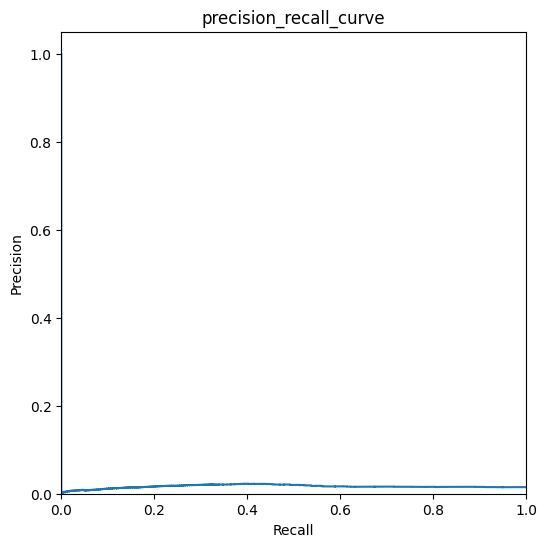

In [54]:
precision, recall, threshold = precision_recall_curve (target_valid, probabilities_one_valid)

plt.figure (figsize=(6,6))
plt.step (recall, precision, where='post')
plt.xlabel ('Recall')
plt.ylabel ('Precision')
plt.ylim ([0.0, 1.05])
plt.xlim ([0.0, 1.0])
plt.title ('precision_recall_curve')
plt.show ()

# TVP y TFP

Tasa de verdaderos positivos -> resultado de respuestas positivas VP, entre todas las respuestas positivas, el número de respuestas positivas es proporcional
al número de todas las respuestas positivas 

TVP = VP/P

Tasa de falsos positivos -> resultado de las respuestas FP entre todas las negativas, El número de respuestas falsas positivas es proporcional al número de 
todas las respuestas negativas.

TVP = FN/N

# Curva ROC

- Valores de la tasa de falsos positivos en el eje horizontal
- Valores de la tasa de verdaderos positivos en el eje vertical
- Se itera sobre los valores del umbral de regresión logistica y se traza la curva ROC

In [56]:
fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid)

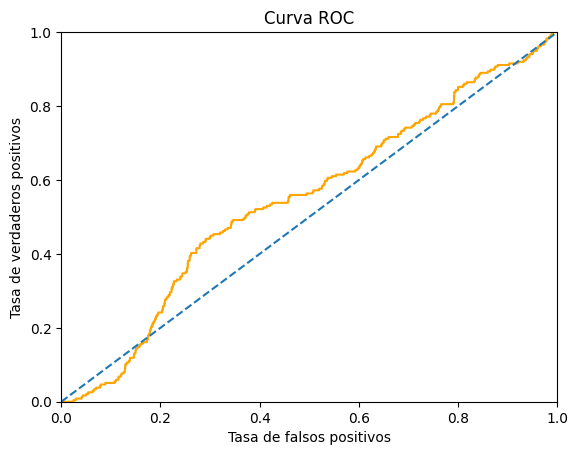

In [59]:
plt.figure ()
plt.plot (fpr, tpr, color='orange')
plt.plot ([0,1],[0,1], linestyle='--')
plt.xlim ([0,1])
plt.ylim ([0,1])
plt.xlabel ('Tasa de falsos positivos')
plt.ylabel ('Tasa de verdaderos positivos')
plt.title ('Curva ROC')
plt.show ()

In [61]:
auc_rco = roc_auc_score (y_valid, probabilities_one_valid)
print (auc_rco)


0.5457476873687734
